# Atividade 02 (ATIV-02)

**Nome:** Márcio Constâncio Junior

Tipo: Somativa;

Tema: Algoritmos básicos de programação em linguagem python e análise de dados.

Conteúdo: Módulo 1 e 2.

Participantes: Individual.

## Avaliação do aluno.

Objetivo: Avaliar desempenho do aluno sobre conhecimentos básicos de programação em linguagem python e visualização e análise de dados.

Nota: 0 a 3 supercrítico, 4 a 6 crítico, 5 a 7 razoável e 8 a 10 bom;

Critérios avaliados: Respostas com coerência, coesão e com exemplos.

Informações adicionais: A atividade é composta por 5 questões dissertativas sobre python e 5 questões sobre visualização e análise de dados.

In [92]:
#Importação de algumas bibliotecas necessárias para o funcionamento deste arquivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Escreva uma função que receba uma lista de números e retorne outra lista com os números ímpares.

In [ ]:
def imprime_impares(lista):
    impares=[]
    for numero in lista:
        if int(numero) % 2 != 0:
            impares.append(int(numero))
    return impares

#Testando a função
imprime_impares([1,2,3,4,5,6,7,8,9,10])

[1, 3, 5, 7, 9]

## 2. Escreva uma função que receba uma lista de números e retorne outra lista com os números primos presentes.

In [50]:
def primos(lista):
    conjunto = set(lista)
    aux = []
    for valor in conjunto:
        divisor = valor//2
        eh_divisivel = 0
        while divisor > 1:
            if int(valor % divisor) == 0:
                eh_divisivel += 1
                divisor -= 1
            divisor -= 1
        if eh_divisivel == 0:
            aux.append(valor)
    return aux

#Testando a função
primos([1,2,3,4,5,6,7,8,9,10,11,12,13,12,14,15,16,17,19,18])


[1, 2, 3, 5, 7, 11, 13, 17, 19]

## 3.​ Escreva uma função que receba duas listas e retorne outra lista com os elementos que estão presentes em apenas uma das listas.

In [60]:
def diferenca_listas(lista1,lista2):
    conj1 = set(lista1)
    conj2 = set(lista2)

    return list(conj1.difference(conj2))

a = [1,2,3,4,5,6]
b = [2,3,6,7,8,9,10]

diferenca_listas(a,b)


[1, 4, 5]

## 4.​ Dada uma lista de números inteiros, escreva uma função para encontrar o segundo maior valor na lista.

In [69]:
def segundo_maior(lista):
    lista.sort()
    return lista[-2]

teste = [1,3,5,7,9,10,2,4,6,8]

segundo_maior(teste)

9

## 5.​ Crie uma função que receba uma lista de tuplas, cada uma contendo o nome e a idade de uma pessoa, e retorne a lista ordenada pelo nome das pessoas em ordem alfabética.

In [77]:
lista = [("Marcio",30),("Paulo",28),("Maria",21),("Rosana",45)]
lista[0]


('Marcio', 30)

## 6.​ Como identificar e tratar outliers em uma coluna numérica usando desvio padrão ou quartis?

In [100]:
dictio = {'coluna1':[0,1,2,3,4,5,6,7,8,9], "coluna2":[2,8,100,14,120,260,50,45,60,150]}
df = pd.DataFrame(dictio)


q1 = df['coluna2'].quantile(0.25)
q3 = df['coluna2'].quantile(0.75)
iqr = q3 - q1
print(q1,q3,iqr)

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print(lower,upper)

df[(df['coluna2'] < lower) | (df['coluna2'] > upper)]

21.75 115.0 93.25
-118.125 254.875


,coluna1,coluna2
5,5,260


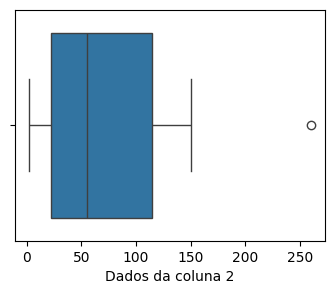

In [104]:
fig = plt.figure(figsize=(4,3))
sns.boxplot(data=df, x = 'coluna2')
plt.xlabel('Dados da coluna 2')
plt.show()

## 7.​ Como concatenar vários DataFrames (empilhando linhas ou colunas), mesmo que tenham colunas diferentes? Dica: Utiliza-se pd.concat() especificando axis=0 (linhas) ou axis=1 (colunas). Quando há colunas diferentes, os valores ausentes são preenchidos com NaN.

## 8.​ Utilizando pandas, como realizar a leitura de um arquivo CSV em um DataFrame e exibir as primeiras linhas?​

## 9.​ Utilizando pandas, como selecionar uma coluna específica e filtrar linhas em um “DataFrame” com base em uma condição?

## 10.​Utilizando pandas, como lidar com valores ausentes (NaN) em um DataFrame?